<a href="https://colab.research.google.com/github/NEYRIB/Projeto-dados-com-Python-e-Pandas-DIO/blob/main/Projeto_dados_com_Python_e_Pandas_dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disclaimer**
#**1ª Etapa - Análise do mês**
Premissas;

*Análise das Compras feitas no mês*

*Análise das Vendas feitas no mês*
#**2ª Etapa - Apuração dos Impostos: ICMS, IPI, PIS e COFINS**
Premissas;

*-Regime de Tributação Lucro Real (débito/crédito)*

*-ICMS e IPI base informada no documento fiscal*

*-PIS e COFINS 1,65% e 7,60% sobre o valor da Nota Fiscal*

*-CFOP considerado: Compras 1102 e 1403, Vendas 5102*

# Preparação

In [3]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

#**Análise do mês**

#*Análise da Planilha com Notas Fiscais de Compras*

In [ ]:
#Criando DataFrame de Compras
df = pd.read_excel("RelatorioNFe-entradas_limpa.xlsx")

In [ ]:
#Visualizando as 5 primeiras linhas
df.head()

,Nº da Nota - Compra,Tipo Oper. - Compra,Natureza Operação - Compra,CNPJ Destinatário - Compra,Razão Social Destinatário - Compra,UF Dest - Compra,CNPJ Emitente - Compra,Razão Social Emitente - Compra,Valor da Nota Fiscal - Compra,Emissão - Compra,Data Entr. Saída - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra,Forma de Pagamento - Compra
0,335953,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,00.189.864/0001-56,FILTROS ELETROPECAS,333.00,2021-07-12,-,333.00,0.0,0.0,A vista
1,222350,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,01.111.114/0001-11,COMERCIAL DE PECAS AUTOMOTIVAS,563.11,2021-07-07,-,561.11,0.0,0.0,28 dias
2,222603,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,01.111.114/0001-11,COMERCIAL DE PECAS AUTOMOTIVAS,1456.56,2021-07-15,-,1454.56,0.0,0.0,28 dias
3,223025,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,01.111.114/0001-11,COMERCIAL DE PECAS AUTOMOTIVAS,1458.64,2021-07-22,-,1458.64,0.0,0.0,28 dias
4,223069,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,01.111.114/0001-11,COMERCIAL DE PECAS AUTOMOTIVAS,65.80,2021-07-23,-,63.80,0.0,0.0,28 dias


In [ ]:
#Quantidade de linhas e colunas
df.shape

(86, 15)

In [ ]:
#Verificando os tipos de dados
df.dtypes

Nº da Nota - Compra                      int64
Tipo Oper.  - Compra                    object
Natureza Operação  - Compra             object
CNPJ Destinatário  - Compra             object
Razão Social Destinatário  - Compra     object
UF Dest - Compra                        object
CNPJ Emitente - Compra                  object
Razão Social Emitente - Compra          object
Valor da Nota Fiscal - Compra          float64
Emissão - Compra                        object
Data Entr. Saída - Compra               object
Valor dos Produtos - Compra            float64
Total ICMS - Compra                    float64
Total IPI - Compra                     float64
Forma de Pagamento - Compra             object
dtype: object

In [ ]:
#Alterando o tipo de dado das colunas Compras
df["Nº da Nota - Compra"] = df["Nº da Nota - Compra"].astype("object")
df["Emissão - Compra"] = df["Emissão - Compra"].astype("datetime64[ns]")

In [ ]:
#Verificando os tipos de dados
df.dtypes

Nº da Nota - Compra                            object
Tipo Oper.  - Compra                           object
Natureza Operação  - Compra                    object
CNPJ Destinatário  - Compra                    object
Razão Social Destinatário  - Compra            object
UF Dest - Compra                               object
CNPJ Emitente - Compra                         object
Razão Social Emitente - Compra                 object
Valor da Nota Fiscal - Compra                 float64
Emissão - Compra                       datetime64[ns]
Data Entr. Saída - Compra                      object
Valor dos Produtos - Compra                   float64
Total ICMS - Compra                           float64
Total IPI - Compra                            float64
Forma de Pagamento - Compra                    object
dtype: object

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Nº da Nota - Compra                    0
Tipo Oper.  - Compra                   0
Natureza Operação  - Compra            0
CNPJ Destinatário  - Compra            0
Razão Social Destinatário  - Compra    0
UF Dest - Compra                       0
CNPJ Emitente - Compra                 0
Razão Social Emitente - Compra         0
Valor da Nota Fiscal - Compra          0
Emissão - Compra                       0
Data Entr. Saída - Compra              0
Valor dos Produtos - Compra            0
Total ICMS - Compra                    0
Total IPI - Compra                     0
Forma de Pagamento - Compra            0
dtype: int64

In [ ]:
df.sample(3)

,Nº da Nota - Compra,Tipo Oper. - Compra,Natureza Operação - Compra,CNPJ Destinatário - Compra,Razão Social Destinatário - Compra,UF Dest - Compra,CNPJ Emitente - Compra,Razão Social Emitente - Compra,Valor da Nota Fiscal - Compra,Emissão - Compra,Data Entr. Saída - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra,Forma de Pagamento - Compra
5,223077,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,01.111.114/0001-11,COMERCIAL DE PECAS AUTOMOTIVAS,112.40,2021-07-23,-,110.40,0.00,0.00,28 dias
68,307020,1 - Entrada,1403 - Compra para comercialização ST,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,66.975.699/0001-47,GLE DO BRASIL LTDA,1102.86,2021-07-29,-,836.54,100.39,66.92,35 DIAS
54,27562,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,11.145.571/0001-10,DQUIM PRODUTOS EIRELI,70947.60,2021-07-28,-,70947.60,8513.71,0.00,A vista


In [ ]:
#Retornando a maior Compra
df["Valor da Nota Fiscal - Compra"].max()

163145.14

In [ ]:
#Retornando a menor Compra
df["Valor da Nota Fiscal - Compra"].min()

20.0

In [ ]:
#Retornando a média das Compras
round(df["Valor da Nota Fiscal - Compra"].mean(),2)

19106.37

In [ ]:
#Retonando em ordem decrescente 3 Maiores Compras
df.nlargest(3, "Valor da Nota Fiscal - Compra")

,Nº da Nota - Compra,Tipo Oper. - Compra,Natureza Operação - Compra,CNPJ Destinatário - Compra,Razão Social Destinatário - Compra,UF Dest - Compra,CNPJ Emitente - Compra,Razão Social Emitente - Compra,Valor da Nota Fiscal - Compra,Emissão - Compra,Data Entr. Saída - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra,Forma de Pagamento - Compra
50,97532,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,04.155.016/0001-74,FAPE FILTROS S.A.,163145.14,2021-07-20,-,125979.84,14687.29,7415.68,42 DIAS
80,359720,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,05.097.111/0001-14,R PECAS AUTOMOTIVAS LTDA,109971.04,2021-07-17,-,109971.04,4398.84,0.00,42 DIAS
85,320953,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,05.097.111/0001-14,R PECAS AUTOMOTIVAS LTDA,105855.38,2021-07-29,-,105855.38,4234.22,0.00,42 DIAS


In [ ]:
#Retonando em ordem crescente 3 Menores Compras
df.nsmallest(3, "Valor da Nota Fiscal - Compra")

,Nº da Nota - Compra,Tipo Oper. - Compra,Natureza Operação - Compra,CNPJ Destinatário - Compra,Razão Social Destinatário - Compra,UF Dest - Compra,CNPJ Emitente - Compra,Razão Social Emitente - Compra,Valor da Nota Fiscal - Compra,Emissão - Compra,Data Entr. Saída - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra,Forma de Pagamento - Compra
33,329650,1 - Entrada,1403 - Compra para comercialização ST,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,40.411.544/0146-74,CLARO S.A,20.0,2021-07-14,-,20.0,0.0,0.0,A vista
4,223069,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,01.111.114/0001-11,COMERCIAL DE PECAS AUTOMOTIVAS,65.8,2021-07-23,-,63.8,0.0,0.0,28 dias
5,223077,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,01.111.114/0001-11,COMERCIAL DE PECAS AUTOMOTIVAS,112.4,2021-07-23,-,110.4,0.0,0.0,28 dias


In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Valor da Nota Fiscal - Compra", ascending=False).head(10)

,Nº da Nota - Compra,Tipo Oper. - Compra,Natureza Operação - Compra,CNPJ Destinatário - Compra,Razão Social Destinatário - Compra,UF Dest - Compra,CNPJ Emitente - Compra,Razão Social Emitente - Compra,Valor da Nota Fiscal - Compra,Emissão - Compra,Data Entr. Saída - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra,Forma de Pagamento - Compra
50,97532,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,04.155.016/0001-74,FAPE FILTROS S.A.,163145.14,2021-07-20,-,125979.84,14687.29,7415.68,42 DIAS
80,359720,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,05.097.111/0001-14,R PECAS AUTOMOTIVAS LTDA,109971.04,2021-07-17,-,109971.04,4398.84,0.00,42 DIAS
85,320953,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,05.097.111/0001-14,R PECAS AUTOMOTIVAS LTDA,105855.38,2021-07-29,-,105855.38,4234.22,0.00,42 DIAS
79,359759,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,05.097.111/0001-14,R PECAS AUTOMOTIVAS LTDA,102902.14,2021-07-17,-,102902.14,4116.09,0.00,42 DIAS
75,3272,1 - Entrada,2653 - Compra de combustível ou lubrificante,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,00.616.970/0001-05,CLUB LUBRIFICANTES LTDA,102066.47,2021-07-09,-,75376.10,0.00,0.00,42 DIAS
46,97532,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,04.155.016/0001-74,FAPE FILTROS S.A.,89575.35,2021-07-20,-,68871.12,7984.74,4331.51,42 DIAS
84,320950,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,05.097.111/0001-14,R PECAS AUTOMOTIVAS LTDA,87423.06,2021-07-29,-,87423.06,3496.92,0.00,42 DIAS
52,97263,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,04.155.016/0001-74,FAPE FILTROS S.A.,76105.56,2021-07-21,-,57562.45,6378.97,4249.90,42 DIAS
54,27562,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,11.145.571/0001-10,DQUIM PRODUTOS EIRELI,70947.60,2021-07-28,-,70947.60,8513.71,0.00,A vista
73,3207,1 - Entrada,2653 - Compra de combustível ou lubrificante,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,MG,00.616.970/0001-05,CLUB LUBRIFICANTES LTDA,70248.17,2021-07-01,-,51878.28,0.00,0.00,42 DIAS


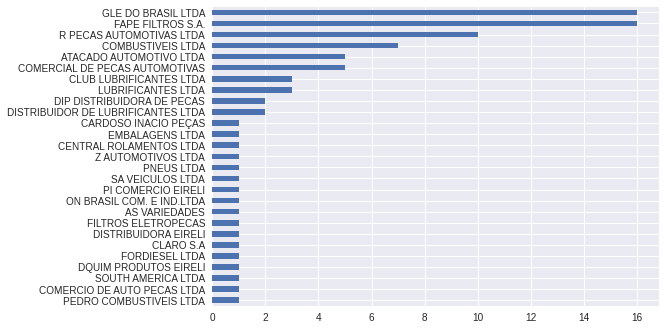

In [ ]:
#Gráfico de barras horizontais
df["Razão Social Emitente - Compra"].value_counts(ascending=True).plot.barh();

In [ ]:
#Agrupamento Natureza da Operação (importante para apuração dos Créditos dos impostos)
df.groupby("Natureza Operação  - Compra")["Valor da Nota Fiscal - Compra"].sum()

Natureza Operação  - Compra
1102 - Compra para comercialização                1151303.98
1202 - Devolução venda de mercadoria adquirida        203.84
1403 - Compra para comercialização ST              174047.52
1653 - Compra de combustível ou lubrificante        64603.28
1922 - Simples faturamento para entrega futura      18405.89
2653 - Compra de combustível ou lubrificante       234258.57
6556 - Devolução de material de uso ou consumo        324.48
Name: Valor da Nota Fiscal - Compra, dtype: float64

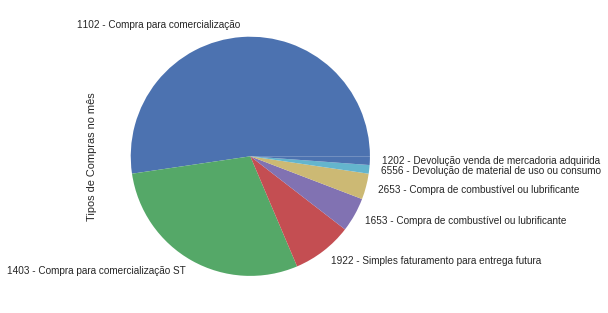

In [ ]:
#Gráfico de Pizza
df["Natureza Operação  - Compra"].value_counts().plot.pie()
plt.ylabel("Tipos de Compras no mês");

#*Análise da Planilha com Notas Fiscais de Vendas*

In [ ]:
#Criando DataFrame de Vendas
df = pd.read_excel("RelatorioNFe-saidas_limpa.xlsx")

In [ ]:
#Visualizando as 5 primeiras linhas
df.head()

,Nº da Nota - Venda,Tipo Oper. - Venda,Natureza Operação - Venda,CNPJ Destinatário - Venda,Razão Social Destinatário - Venda,UF Dest - Venda,CNPJ Emitente - Venda,Razão Social Emitente - Venda,Valor da Nota Fiscal - Venda,Emissão - Venda,Data Entr. Saída - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda,Forma de Pagamento - Venda
0,43363,1 - Saída,5102 - Venda de mercadoria,19.697.697/0001-66,CAITANO PEÇAS,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,2034.66,2021-07-01,-,2034.66,0.0,0.0,28 DIAS
1,43364,1 - Saída,5102 - Venda de mercadoria,76.977.957/0001-46,MAIA PEÇAS,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,646.56,2021-07-01,-,646.56,0.0,0.0,A VISTA
2,43365,1 - Saída,5102 - Venda de mercadoria,59.961.974/0001-74,SILVA PEÇAS,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,759.60,2021-07-01,-,759.60,0.0,0.0,A VISTA
3,43366,1 - Saída,5102 - Venda de mercadoria,17.466.499/0001-00,SPARTA CENTRO AUTOMOTIVO LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,813.60,2021-07-01,-,813.60,0.0,0.0,A VISTA
4,43367,1 - Saída,5102 - Venda de mercadoria,19.197.619/0001-96,COMERCIO DE LUBRIFICANTES LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,762.00,2021-07-01,-,762.00,0.0,0.0,A VISTA


In [ ]:
#Quantidade de linhas e colunas
df.shape

(1483, 15)

In [ ]:
#Verificando os tipos de dados
df.dtypes

Nº da Nota - Venda                     int64
Tipo Oper. - Venda                    object
Natureza Operação - Venda             object
CNPJ Destinatário - Venda             object
Razão Social Destinatário - Venda     object
UF Dest - Venda                       object
CNPJ Emitente - Venda                 object
Razão Social Emitente - Venda         object
Valor da Nota Fiscal - Venda         float64
Emissão - Venda                       object
Data Entr. Saída - Venda              object
Valor dos Produtos - Venda           float64
Total ICMS - Venda                   float64
Total IPI - Venda                    float64
Forma de Pagamento - Venda            object
dtype: object

In [ ]:
#Alterando o tipo de dado das colunas Compras
df["Nº da Nota - Venda"] = df["Nº da Nota - Venda"].astype("object")
df["Emissão - Venda"] = df["Emissão - Venda"].astype("datetime64[ns]")

In [ ]:
#Verificando os tipos de dados
df.dtypes

Nº da Nota - Venda                           object
Tipo Oper. - Venda                           object
Natureza Operação - Venda                    object
CNPJ Destinatário - Venda                    object
Razão Social Destinatário - Venda            object
UF Dest - Venda                              object
CNPJ Emitente - Venda                        object
Razão Social Emitente - Venda                object
Valor da Nota Fiscal - Venda                float64
Emissão - Venda                      datetime64[ns]
Data Entr. Saída - Venda                     object
Valor dos Produtos - Venda                  float64
Total ICMS - Venda                          float64
Total IPI - Venda                           float64
Forma de Pagamento - Venda                   object
dtype: object

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Nº da Nota - Venda                   0
Tipo Oper. - Venda                   0
Natureza Operação - Venda            0
CNPJ Destinatário - Venda            0
Razão Social Destinatário - Venda    0
UF Dest - Venda                      0
CNPJ Emitente - Venda                0
Razão Social Emitente - Venda        0
Valor da Nota Fiscal - Venda         0
Emissão - Venda                      0
Data Entr. Saída - Venda             0
Valor dos Produtos - Venda           0
Total ICMS - Venda                   0
Total IPI - Venda                    0
Forma de Pagamento - Venda           0
dtype: int64

In [ ]:
df.sample(3)

,Nº da Nota - Venda,Tipo Oper. - Venda,Natureza Operação - Venda,CNPJ Destinatário - Venda,Razão Social Destinatário - Venda,UF Dest - Venda,CNPJ Emitente - Venda,Razão Social Emitente - Venda,Valor da Nota Fiscal - Venda,Emissão - Venda,Data Entr. Saída - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda,Forma de Pagamento - Venda
1482,44563,1 - Saída,5102 - Venda de mercadoria,10.470.695/0001-56,LUBRIFICANTES BANDEIRANTES LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,601.55,2021-07-30,-,601.55,0.0,0.0,A VISTA
380,43448,1 - Saída,5102 - Venda de mercadoria,55.100.905/0001-75,UNAVIA PECAS E AUTO ELETRICA EIRELI,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,1408.85,2021-07-08,-,1408.85,0.0,0.0,28 DIAS
855,43929,1 - Saída,5102 - Venda de mercadoria,41.069.174/0001-99,V NORTE LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,362.09,2021-07-19,-,317.09,0.0,0.0,A VISTA


In [ ]:
#Retornando a maior Venda do mês
df["Valor da Nota Fiscal - Venda"].max()

62277.6

In [ ]:
#Retornando a menor Venda do mês
df["Valor da Nota Fiscal - Venda"].min()

75.42

In [ ]:
#Retornando a média das Vendas do mês
round(df["Valor da Nota Fiscal - Venda"].mean(), 2)

1829.54

In [ ]:
#Retonando em ordem decrescente 3 Maiores Compras
df.nlargest(3, "Valor da Nota Fiscal - Venda")

,Nº da Nota - Venda,Tipo Oper. - Venda,Natureza Operação - Venda,CNPJ Destinatário - Venda,Razão Social Destinatário - Venda,UF Dest - Venda,CNPJ Emitente - Venda,Razão Social Emitente - Venda,Valor da Nota Fiscal - Venda,Emissão - Venda,Data Entr. Saída - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda,Forma de Pagamento - Venda
757,43833,1 - Saída,5102 - Venda de mercadoria,16.655.965/0001-96,AUTO BITTS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,62277.6,2021-07-15,-,62277.6,0.0,0.0,42 Dias
508,44479,1 - Saída,5102 - Venda de mercadoria,50.999.976/0001-99,RFX DISTRIBUIDORA DE PRODUTOS AUTOMOTIVOS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,56410.4,2021-07-12,-,56410.4,0.0,0.0,42 Dias
1434,44553,1 - Saída,5102 - Venda de mercadoria,79.771.717/0001-96,LIDER AUTOMOTIVA PECAS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,32393.2,2021-07-30,-,32393.2,0.0,0.0,42 Dias


In [ ]:
#Retonando em ordem crescente 3 Menores Compras
df.nsmallest(3, "Valor da Nota Fiscal - Venda")

,Nº da Nota - Venda,Tipo Oper. - Venda,Natureza Operação - Venda,CNPJ Destinatário - Venda,Razão Social Destinatário - Venda,UF Dest - Venda,CNPJ Emitente - Venda,Razão Social Emitente - Venda,Valor da Nota Fiscal - Venda,Emissão - Venda,Data Entr. Saída - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda,Forma de Pagamento - Venda
775,43848,1 - Saída,5202 - Devolução de compra para comercialização,00.616.970/0005-06,TECLUB INDUSTRIA E COMERCIO DE LUBRIFICANTES LTDA,PR,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,75.42,2021-07-16,-,58.97,0.00,0.0,A VISTA
55,43558,1 - Saída,5102 - Venda de mercadoria,41.517.704/0001-50,SAO CRISTOVAO COMBUSTIVEIS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,106.08,2021-07-01,-,106.08,19.09,0.0,A VISTA
428,43498,1 - Saída,5102 - Venda de mercadoria,19.999.667/0001-99,MARCHALENTA AUTO SERVICOS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,124.45,2021-07-09,-,124.45,8.42,0.0,A VISTA


In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Valor da Nota Fiscal - Venda", ascending=False).head(10)

,Nº da Nota - Venda,Tipo Oper. - Venda,Natureza Operação - Venda,CNPJ Destinatário - Venda,Razão Social Destinatário - Venda,UF Dest - Venda,CNPJ Emitente - Venda,Razão Social Emitente - Venda,Valor da Nota Fiscal - Venda,Emissão - Venda,Data Entr. Saída - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda,Forma de Pagamento - Venda
757,43833,1 - Saída,5102 - Venda de mercadoria,16.655.965/0001-96,AUTO BITTS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,62277.60,2021-07-15,-,62277.60,0.00,0.0,42 Dias
508,44479,1 - Saída,5102 - Venda de mercadoria,50.999.976/0001-99,RFX DISTRIBUIDORA DE PRODUTOS AUTOMOTIVOS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,56410.40,2021-07-12,-,56410.40,0.00,0.0,42 Dias
1434,44553,1 - Saída,5102 - Venda de mercadoria,79.771.717/0001-96,LIDER AUTOMOTIVA PECAS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,32393.20,2021-07-30,-,32393.20,0.00,0.0,42 Dias
1016,44395,1 - Saída,5102 - Venda de mercadoria,57.196.166/0001-60,OTHON LUB LTDA - EPP,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,26880.00,2021-07-21,-,26880.00,0.00,0.0,42 Dias
1291,44369,1 - Saída,5102 - Venda de mercadoria,17.960.090/0001-66,AUTO POSTO TREVINHO LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,25884.93,2021-07-28,-,25884.93,651.78,0.0,42 Dias
532,43633,1 - Saída,5102 - Venda de mercadoria,01.970.179/0001-77,CELT LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,24687.19,2021-07-12,-,24687.19,0.00,0.0,42 Dias
749,43825,1 - Saída,5102 - Venda de mercadoria,16.655.965/0007-69,AUTO BITTS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,23888.88,2021-07-15,-,23888.88,0.00,0.0,42 Dias
1375,44454,1 - Saída,5102 - Venda de mercadoria,57.196.166/0001-60,OTHON LUB LTDA - EPP,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,18930.00,2021-07-29,-,18930.00,0.00,0.0,42 Dias
291,43448,1 - Saída,5102 - Venda de mercadoria,79.771.717/0001-96,LIDER AUTOMOTIVA PECAS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,15173.20,2021-07-07,-,15173.20,0.00,0.0,42 Dias
770,43843,1 - Saída,5102 - Venda de mercadoria,16.655.965/0004-79,AUTO BITTS LTDA,MG,17.011.236/0001-59,DISTRIBUIDORA AUTOMOTIVOS S.A.,14680.32,2021-07-16,-,14680.32,0.00,0.0,42 Dias


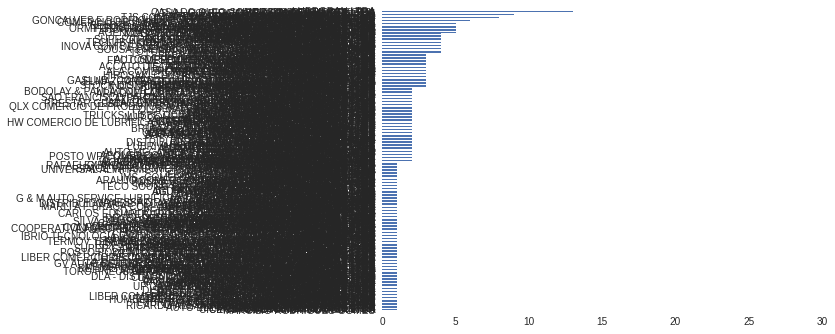

In [ ]:
#Gráfico de barras horizontais
df["Razão Social Destinatário - Venda"].value_counts(ascending=True).plot.barh();

In [ ]:
#Agrupamento Natureza da Operação (importante para apuração dos Créditos dos impostos)
df.groupby("Natureza Operação - Venda")["Valor da Nota Fiscal - Venda"].sum()

Natureza Operação - Venda
5102 - Venda de mercadoria                         2696894.23
5202 - Devolução de compra para comercialização      15955.43
5910 - Remessa em bonificação                          354.40
Name: Valor da Nota Fiscal - Venda, dtype: float64

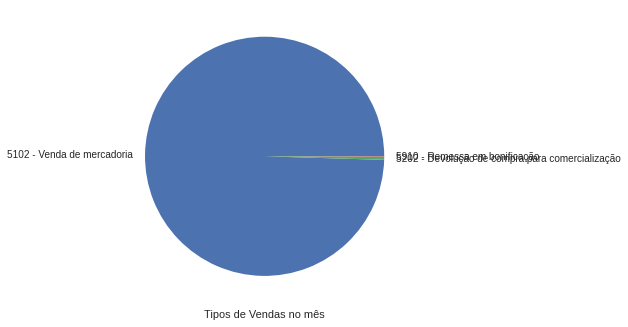

In [ ]:
#Gráfico de Pizza
df["Natureza Operação - Venda"].value_counts().plot.pie()
plt.xlabel("Tipos de Vendas no mês");
plt.ylabel("");

# **Apuração dos Impostos**

In [5]:
#Base de Cálculo
df1 = pd.read_excel("/content/RelatorioNFe-entradas_limpa.xlsx")
df2 = pd.read_excel("/content/RelatorioNFe-saidas_limpa.xlsx")

In [7]:
df1["Natureza Operação  - Compra"].unique()

array(['1102 - Compra para comercialização',
       '1403 - Compra para comercialização ST',
       '1653 - Compra de combustível ou lubrificante',
       '1202 - Devolução venda de mercadoria adquirida',
       '1922 - Simples faturamento para entrega futura',
       '6556 - Devolução de material de uso ou consumo',
       '2653 - Compra de combustível ou lubrificante'], dtype=object)

In [27]:
df1.groupby("Natureza Operação  - Compra")["Total ICMS - Compra"].nunique()

Natureza Operação  - Compra
1102 - Compra para comercialização                33
1202 - Devolução venda de mercadoria adquirida     1
1403 - Compra para comercialização ST             17
1653 - Compra de combustível ou lubrificante       1
1922 - Simples faturamento para entrega futura     1
2653 - Compra de combustível ou lubrificante       1
6556 - Devolução de material de uso ou consumo     1
Name: Total ICMS - Compra, dtype: int64

In [30]:
df1.groupby("Natureza Operação  - Compra")["Total ICMS - Compra"].sum()

Natureza Operação  - Compra
1102 - Compra para comercialização                79324.05
1202 - Devolução venda de mercadoria adquirida        0.00
1403 - Compra para comercialização ST             10426.93
1653 - Compra de combustível ou lubrificante          0.00
1922 - Simples faturamento para entrega futura        0.00
2653 - Compra de combustível ou lubrificante          0.00
6556 - Devolução de material de uso ou consumo        0.00
Name: Total ICMS - Compra, dtype: float64

In [ ]:
ICMS_CRED = df1.groupby(df1["Natureza Operação  - Compra"].isin([["1102 - Compra para comercialização", "1403 - Compra para comercialização ST"]]))["Total ICMS - Compra"].sum()
N = ICMS_CRED + 111
print(N)

Natureza Operação  - Compra
False    89861.98
Name: Total ICMS - Compra, dtype: float64


In [ ]:
df1[["Natureza Operação  - Compra", "Total ICMS - Compra"]]
df1.groupby(df1["Natureza Operação  - Compra"])["Total ICMS - Compra"].sum()

Natureza Operação  - Compra
1102 - Compra para comercialização                79324.05
1202 - Devolução venda de mercadoria adquirida        0.00
1403 - Compra para comercialização ST             10426.93
1653 - Compra de combustível ou lubrificante          0.00
1922 - Simples faturamento para entrega futura        0.00
2653 - Compra de combustível ou lubrificante          0.00
6556 - Devolução de material de uso ou consumo        0.00
Name: Total ICMS - Compra, dtype: float64

In [ ]:
df1.groupby(["Natureza Operação  - Compra"].isin([["1102 - Compra para comercialização", "1403 - Compra para comercialização ST"]]))[["Total ICMS - Compra"]].sum()

AttributeError: ignored

In [ ]:
df1.isin([["1102 - Compra para comercialização", "1403 - Compra para comercialização ST"]]).groupby(["Natureza Operação  - Compra"])[["Total ICMS - Compra"]].sum()

,Total ICMS - Compra
Natureza Operação - Compra,
False,0


In [ ]:
print(credito)

NameError: ignored

In [ ]:
credito.loc("Total ICMS - Compra")

NameError: ignored

# **ICMS** - Imposto sobre Circulação de Mercadorias e Serviços

In [ ]:
ICMS_CRED = df1.groupby(df1["Natureza Operação  - Compra"])["Total ICMS - Compra"].sum()
print(ICMS_CRED)

Natureza Operação  - Compra
1102 - Compra para comercialização                79324.05
1202 - Devolução venda de mercadoria adquirida        0.00
1403 - Compra para comercialização ST             10426.93
1653 - Compra de combustível ou lubrificante          0.00
1922 - Simples faturamento para entrega futura        0.00
2653 - Compra de combustível ou lubrificante          0.00
6556 - Devolução de material de uso ou consumo        0.00
Name: Total ICMS - Compra, dtype: float64


In [ ]:
ICMS_DEBT = df2.groupby(df2["Natureza Operação - Venda"])["Total ICMS - Venda"].sum()
display(ICMS_DEBT)

Natureza Operação - Venda
5102 - Venda de mercadoria                         10141.75
5202 - Devolução de compra para comercialização        0.00
5910 - Remessa em bonificação                          0.00
Name: Total ICMS - Venda, dtype: float64

In [ ]:
round(ICMS_CRED.sum() - ICMS_DEBT.sum(),2)

79609.23

# **IPI** - Imposto sobre Produtos Industrializados

In [ ]:
IPI_CRED = df1.groupby(df1["Natureza Operação  - Compra"])["Total IPI - Compra"].sum()
display(IPI_CRED)

Natureza Operação  - Compra
1102 - Compra para comercialização                29156.26
1202 - Devolução venda de mercadoria adquirida        0.00
1403 - Compra para comercialização ST              8828.29
1653 - Compra de combustível ou lubrificante          0.00
1922 - Simples faturamento para entrega futura        0.00
2653 - Compra de combustível ou lubrificante          0.00
6556 - Devolução de material de uso ou consumo        0.00
Name: Total IPI - Compra, dtype: float64

In [ ]:
IPI_DEBT = df2.groupby(df2["Natureza Operação - Venda"])["Total IPI - Venda"].sum()
display(IPI_DEBT)

Natureza Operação - Venda
5102 - Venda de mercadoria                         0.0
5202 - Devolução de compra para comercialização    0.0
5910 - Remessa em bonificação                      0.0
Name: Total IPI - Venda, dtype: float64

In [ ]:
IPI_CRED.sum() - IPI_DEBT.sum()

37984.55

# **PIS** - Programa de Integração Social

In [ ]:
PIS_CRED = df1.groupby(df1["Natureza Operação  - Compra"])["Valor da Nota Fiscal - Compra"].sum()
display(PIS_CRED)

Natureza Operação  - Compra
1102 - Compra para comercialização                1151303.98
1202 - Devolução venda de mercadoria adquirida        203.84
1403 - Compra para comercialização ST              174047.52
1653 - Compra de combustível ou lubrificante        64603.28
1922 - Simples faturamento para entrega futura      18405.89
2653 - Compra de combustível ou lubrificante       234258.57
6556 - Devolução de material de uso ou consumo        324.48
Name: Valor da Nota Fiscal - Compra, dtype: float64

In [ ]:
PIS_DEBT = df2.groupby(df2["Natureza Operação - Venda"])["Valor da Nota Fiscal - Venda"].sum()
display(PIS_DEBT)

Natureza Operação - Venda
5102 - Venda de mercadoria                         2696894.23
5202 - Devolução de compra para comercialização      15955.43
5910 - Remessa em bonificação                          354.40
Name: Valor da Nota Fiscal - Venda, dtype: float64

In [ ]:
round(PIS_CRED.sum() - PIS_DEBT.sum(), 2)

-1070056.5

# **COFINS** - Contribuição para o Financiamento da Seguridade Social

In [ ]:
COFINS_CRED = df1.groupby(df1["Natureza Operação  - Compra"])["Valor da Nota Fiscal - Compra"].sum()
display(COFINS_CRED)

Natureza Operação  - Compra
1102 - Compra para comercialização                1151303.98
1202 - Devolução venda de mercadoria adquirida        203.84
1403 - Compra para comercialização ST              174047.52
1653 - Compra de combustível ou lubrificante        64603.28
1922 - Simples faturamento para entrega futura      18405.89
2653 - Compra de combustível ou lubrificante       234258.57
6556 - Devolução de material de uso ou consumo        324.48
Name: Valor da Nota Fiscal - Compra, dtype: float64

In [ ]:
COFINS_DEBT = df2.groupby(df2["Natureza Operação - Venda"])["Valor da Nota Fiscal - Venda"].sum()
display(COFINS_DEBT)

Natureza Operação - Venda
5102 - Venda de mercadoria                         2696894.23
5202 - Devolução de compra para comercialização      15955.43
5910 - Remessa em bonificação                          354.40
Name: Valor da Nota Fiscal - Venda, dtype: float64

In [ ]:
round(COFINS_CRED.sum() - COFINS_DEBT.sum(), 2)

-1070056.5